# NLP with Python: Text Clustering

Source: https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering/

__Import Libraries__

In [38]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_palette('colorblind')

from sklearn.datasets import load_files
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, NMF
from sklearn.metrics import homogeneity_score, silhouette_score

np.random.seed(42)

## Introduction

Clustering is a process of grouping similar items together. Each group, also called as a cluster, contains items that are similar to each other. Clustering algorithms are unsupervised learning algorithms i.e. we do not need to have labelled datasets. There are many clustering algorithms for clustering including KMeans, DBSCAN, Spectral clustering, hierarchical clustering etc and they have their own advantages and disadvantages. The choice of the algorithm mainly depends on whether or not you already know how many clusters to create. Some algorithms such as KMeans need you to specify number of clusters to create whereas DBSCAN does not need you to specify. Another consideration is whether you need the trained model to able to predict cluster for unseen dataset. KMeans can be used to predict the clusters for new dataset whereas DBSCAN cannot be used for new dataset.

In [2]:
# download data
!wget http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip

--2020-07-01 12:34:42--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874078 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  4.04MB/s    in 0.7s    

2020-07-01 12:34:43 (4.04 MB/s) - ‘bbc-fulltext.zip’ saved [2874078/2874078]



In [3]:
with zipfile.ZipFile('/content/bbc-fulltext.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/bbc-fulltext')

In [4]:
path = '/content/bbc-fulltext/bbc'
files = load_files(path, encoding='utf-8', decode_error='replace')
print(files)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
df = pd.DataFrame(list(zip(files['data'], files['target'])), columns=['text', 'label'])
df.head()

,text,label
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,0
1,Halo 2 sells five million copies\n\nMicrosoft ...,4
2,MSPs hear renewed climate warning\n\nClimate c...,2
3,Pavey focuses on indoor success\n\nJo Pavey wi...,3
4,Tories reject rethink on axed MP\n\nSacked MP ...,2


In [6]:
df['char_count'] = df['text'].str.len()
df[['text', 'char_count']].head()

,text,char_count
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,1118
1,Halo 2 sells five million copies\n\nMicrosoft ...,1846
2,MSPs hear renewed climate warning\n\nClimate c...,1731
3,Pavey focuses on indoor success\n\nJo Pavey wi...,775
4,Tories reject rethink on axed MP\n\nSacked MP ...,3298


In [7]:
labels = np.sort(df['label'].unique())
labels

array([0, 1, 2, 3, 4])

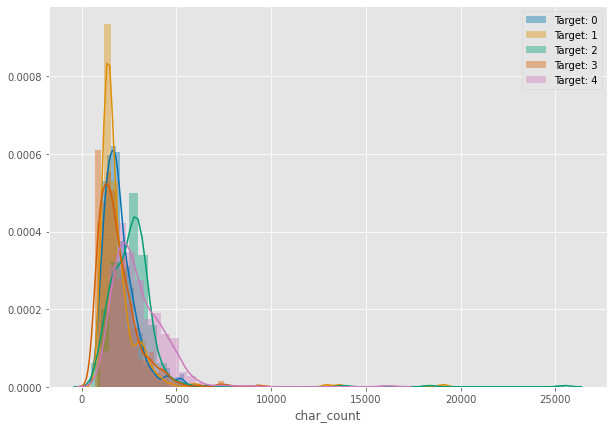

In [8]:
plt.figure(figsize=(10, 7))
for i in labels:
    sns.distplot(df[df['label'] == i]['char_count'], label=f'Target: {i}')
plt.legend();

In [9]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df[['text', 'word_count']].head()

,text,word_count
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,187
1,Halo 2 sells five million copies\n\nMicrosoft ...,327
2,MSPs hear renewed climate warning\n\nClimate c...,264
3,Pavey focuses on indoor success\n\nJo Pavey wi...,131
4,Tories reject rethink on axed MP\n\nSacked MP ...,543


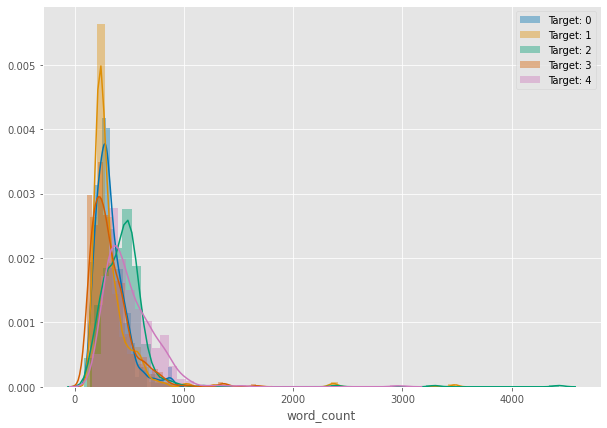

In [14]:
plt.figure(figsize=(10, 7))
for i in labels:
    sns.distplot(df[df['label'] == i]['word_count'], label=f'Target: {i}')
plt.legend();

In [13]:
df['avg_word'] = df['text'].apply(lambda x: sum(len(word) for word in x.split())) / df['word_count']
df[['text', 'avg_word']].head()

,text,avg_word
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,4.962567
1,Halo 2 sells five million copies\n\nMicrosoft ...,4.629969
2,MSPs hear renewed climate warning\n\nClimate c...,5.541667
3,Pavey focuses on indoor success\n\nJo Pavey wi...,4.900763
4,Tories reject rethink on axed MP\n\nSacked MP ...,5.058932


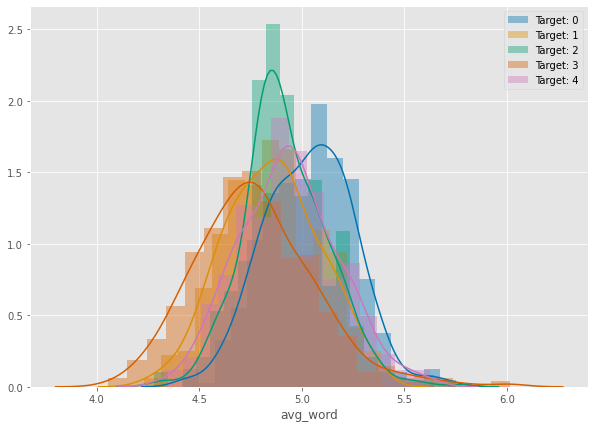

In [15]:
plt.figure(figsize=(10, 7))
for i in labels:
    sns.distplot(df[df['label'] == i]['avg_word'], label=f'Target: {i}')
plt.legend();

## Feature Extraction

In [17]:
vec = TfidfVectorizer(stop_words='english')
features = vec.fit_transform(df['text'])
features.shape

(2225, 29126)

In [18]:
cls = MiniBatchKMeans(n_clusters=5)
clustered = cls.fit_predict(features)

In [21]:
clustered[:5]

array([4, 2, 4, 1, 3], dtype=int32)

In [23]:
cls.labels_[:5]

array([4, 2, 4, 1, 3], dtype=int32)

## Visualization

In [28]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features.toarray())

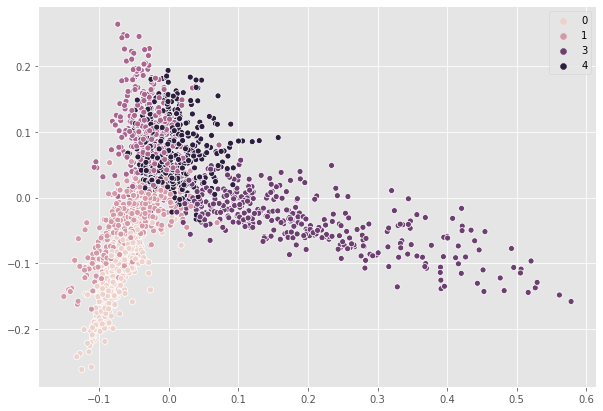

In [33]:
plt.figure(figsize=(10, 7))
sns.scatterplot(features_pca[:, 0], features_pca[:, 1], hue=clustered);

In [34]:
nmf = NMF(n_components=2, solver='mu')
features_nmf = nmf.fit_transform(features)

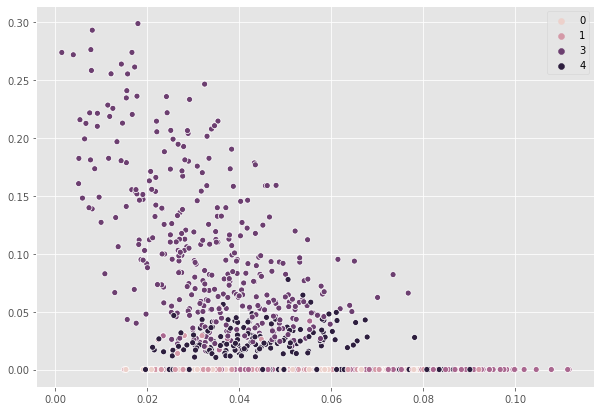

In [35]:
plt.figure(figsize=(10, 7))
sns.scatterplot(features_nmf[:, 0], features_nmf[:, 1], hue=clustered);

### Evaluation

In [37]:
# Homogeneity Score
homogeneity_score(df['label'], clustered)

0.7849798121162079

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a,b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [39]:
# Sillhouette Score
silhouette_score(features, labels=clustered)

0.011805015239480066